In [1]:
import ndjson
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
with open('./Digital_Music_5.json') as f:
    data=ndjson.load(f)

In [7]:
reviews_df=pd.DataFrame(data)
reviews_df.shape

(169781, 12)

In [8]:
reviews_df.head()


,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image
0,5.0,3,True,"06 3, 2013",A2TYZ821XXK2YZ,3426958910,{'Format:': ' Audio CD'},Garrett,"This is awesome to listen to, A must-have for ...",Slayer Rules!,1370217600,NaN
1,5.0,NaN,True,"10 11, 2014",A3OFSREZADFUDY,3426958910,{'Format:': ' Audio CD'},Ad,bien,Five Stars,1412985600,NaN
2,5.0,NaN,True,"02 11, 2014",A2VAMODP8M77NG,3426958910,{'Format:': ' Audio CD'},JTGabq,It was great to hear the old stuff again and I...,SLAYER!!!!!!!!!!!!!!!!!!!!!,1392076800,NaN
3,4.0,3,False,"12 7, 2013",AAKSLZ9IDTEH0,3426958910,{'Format:': ' Audio CD'},john F&#039;n doe,well best of's are a bit poison normally but t...,slayer greatest hits! you mean everything righ...,1386374400,NaN
4,5.0,NaN,True,"06 12, 2016",A3OH43OZJLKI09,5557706259,{'Format:': ' Audio CD'},melinda a goodman,What can I say? This is Casting Crowns!!!This ...,"This is a good, blessing filled",1465689600,NaN


Data Dictionry

overall - rating of the product
vote - helpful votes of the review
reviewTime - time of the review (raw)
reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B
asin - ID of the product, e.g. 0000013714
style - a disctionary of the product metadata, e.g., "Format" is "Hardcover"
reviewerName - name of the reviewer
reviewText - text of the review
summary - summary of the review
unixReviewTime - time of the review (unix time)
image - images that users post after they have received the product

In [9]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169781 entries, 0 to 169780
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   overall         169781 non-null  float64
 1   vote            7611 non-null    object 
 2   verified        169781 non-null  bool   
 3   reviewTime      169781 non-null  object 
 4   reviewerID      169781 non-null  object 
 5   asin            169781 non-null  object 
 6   style           157989 non-null  object 
 7   reviewerName    169776 non-null  object 
 8   reviewText      169623 non-null  object 
 9   summary         169745 non-null  object 
 10  unixReviewTime  169781 non-null  int64  
 11  image           182 non-null     object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 14.4+ MB


<Axes: xlabel='overall', ylabel='count'>

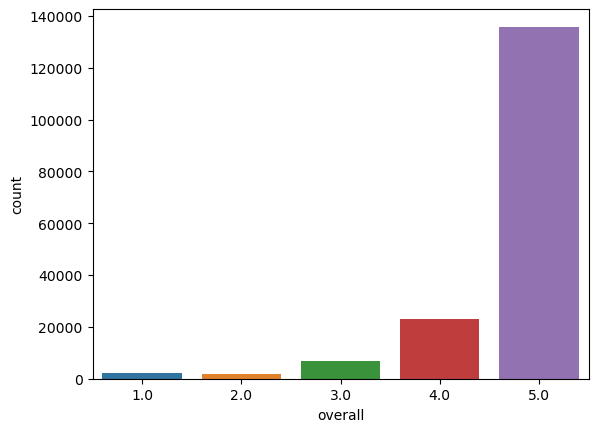

In [10]:
sns.countplot(data=reviews_df,x='overall')

Taking a random sample of the reviews by selecting 1500 reviews with rating 1, 500-500-500 reviews with ratings 2, 3, 4, and 1500 reviews with rating 5 for a smaller corpus

In [11]:
one_1500 = reviews_df[reviews_df['overall']==1.0].sample(n=1500)
two_500 = reviews_df[reviews_df['overall']==2.0].sample(n=500)
three_500 = reviews_df[reviews_df['overall']==3.0].sample(n=500)
four_500 = reviews_df[reviews_df['overall']==4.0].sample(n=500)
five_1500 = reviews_df[reviews_df['overall']==5.0].sample(n=1500)

In [12]:
undersampled_reviews = pd.concat([one_1500, two_500, three_500, four_500, five_1500], axis=0)

In [13]:
undersampled_reviews['overall'].value_counts(dropna=False)

overall
1.0    1500
5.0    1500
2.0     500
3.0     500
4.0     500
Name: count, dtype: int64

<Axes: xlabel='overall', ylabel='count'>

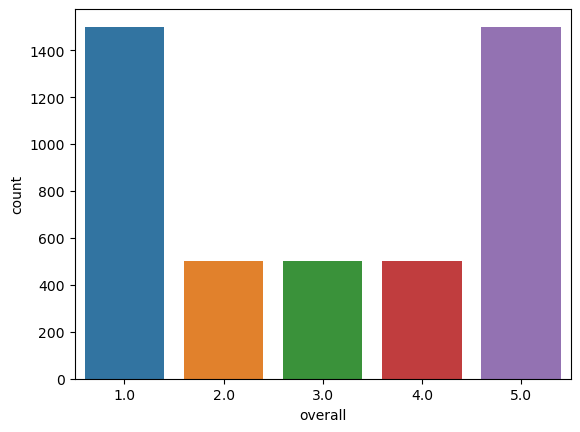

In [14]:
sns.countplot(data=undersampled_reviews, x='overall')

In [15]:
sample_100K_revs = reviews_df.sample(n=100000, random_state=42)

In [18]:
undersampled_reviews.to_csv("./processed_data.csv", index=False)

In [19]:
	
sample_100K_revs.to_csv("./processed_data.csv", index=False)